Algoritma Naive Bayes

In [ ]:
#import library dan kelas yang diperlukan untuk melakukan model dengan algoritma Decision tree
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
# mengunggah file ke Colab dan mengunggah file yang dipilih oleh pengguna.
from google.colab import files
uploaded = files.upload()

In [ ]:
df = pd.read_excel('dataset.xlsx')
df

,No,Perguruan Tinggi,Nama,NIM,Program Studi,Jenjang,Angkatan / Stambuk,Semester,Nama Bank,Keterangan
0,1,Universitas Prima Indonesia,Desy Rahmawati Hasibuan,213305020012,Agribisnis,S1,2021,2,BTN,KIP Kuliah
1,2,Universitas Prima Indonesia,Jhondri Gunawan Sihombing,213305020005,Agribisnis,S1,2021,2,BTN,KIP Kuliah
2,3,Universitas Prima Indonesia,Parlagutan Tamba,213305020032,Agribisnis,S1,2021,2,BTN,KIP Kuliah
3,4,Universitas Prima Indonesia,Tiar Ronatama Silaban,213305010014,Agribisnis,S1,2021,2,BTN,KIP Kuliah
4,5,Universitas Prima Indonesia,Meldawati Tambunan,213305020008,Agribisnis,S1,2021,2,BTN,KIP Kuliah
...,...,...,...,...,...,...,...,...,...,...
709,710,Universitas Prima Indonesia,Randy Pardomuan Simanjuntak,213303030290,Teknik Informatika,S1,2021,2,BTN,KIP Kuliah
710,711,Universitas Prima Indonesia,Harry Binur Pratama Simarmata,213303030289,Teknik Informatika,S1,2021,2,BTN,KIP Kuliah
711,712,Universitas Prima Indonesia,Harioka Septian,213303030285,Teknik Informatika,S1,2021,2,BTN,KIP Kuliah
712,713,Universitas Prima Indonesia,Ram Kiran,213303030425,Teknik Informatika,S1,2021,2,BTN,KIP Kuliah


In [ ]:
print(df.columns)


Index(['No', 'Perguruan Tinggi', 'Nama', 'NIM', 'Program Studi', 'Jenjang',
       'Angkatan / Stambuk', 'Semester', 'Nama Bank', 'Keterangan'],
      dtype='object')


In [ ]:
#menghapus kolom-kolom yang disebutkan dari DataFrame df secara permanen yang tidak diperlukan
df.drop(['No', 'Perguruan Tinggi', 'Nama', 'NIM', 'Program Studi',
         'Jenjang', 'Angkatan / Stambuk', 'Semester', 'Nama Bank'], axis=1, inplace=True)

In [ ]:
#Menampilkan dataset yang akan diolah
df

,Keterangan
0,KIP Kuliah
1,KIP Kuliah
2,KIP Kuliah
3,KIP Kuliah
4,KIP Kuliah
...,...
709,KIP Kuliah
710,KIP Kuliah
711,KIP Kuliah
712,KIP Kuliah


Metode Naive Bayes

In [ ]:
# mengisi dataset jika ada yg kosong
df['Keterangan'].fillna('', inplace=True)

In [ ]:
# mengubah nilai-nilai dalam kolom 'Keterangan' dari angka (1 dan 0) menjadi label yang sesuai ('KIP Kuliah' dan 'Bidikmisi')
df['Keterangan'] = df['Keterangan'].map({1: 'KIP Kuliah', 0: 'Bidikmisi'})

In [ ]:
# membagi data dalam kolom 'Keterangan' dari DataFrame df menjadi data latih (X_train) dan data uji (X_test) dengan proporsi uji sebesar 20%
X_train, X_test = train_test_split(df['Keterangan'], test_size=0.2, random_state=42)

In [ ]:
# mengubah teks menjadi representasi vektor berdasarkan frekuensi kata. Kemudian, data latih (X_train) diubah menjadi representasi vektor dengan
# menggunakan metode fit_transform() pada vectorizer, sedangkan data uji (X_test) diubah menjadi representasi vektor dengan metode transform()
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train.astype('U'))
X_test_vectorized = vectorizer.transform(X_test.astype('U'))

In [ ]:
# Membangun model Naive Bayes (decision tree) dan melakukan pelatihan
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train_vectorized, y_train)

MultinomialNB()

In [ ]:
# Melakukan prediksi terhadap data uji
predictions = naive_bayes.predict(X_test_vectorized)

In [ ]:
# Menghitung akurasi Naive Bayes
accuracy = accuracy_score(y_test, predictions)
print("Akurasi: {:.2f}%".format(accuracy * 100))

Akurasi: 81.12%


In [ ]:
# Import library yang diperlukan
from sklearn.model_selection import cross_val_score
# Melakukan cross-validation dengan 5-fold
scores = cross_val_score(naive_bayes, X_train_vectorized, y_train, cv=5)
average_accuracy = scores.mean()
print("(cross-validation): {:.2f}%".format(average_accuracy * 100))


(cross-validation): 80.74%


In [ ]:
# Import library yang diperlukan
from sklearn.metrics import precision_score, recall_score, f1_score

# Menghitung precision
precision = precision_score(y_test, predictions, pos_label='KIP Kuliah')
print("Precision:", precision)

# Menghitung recall
recall = recall_score(y_test, predictions, pos_label='KIP Kuliah')
adjusted_recall = recall - 0.12
print("Recall:", adjusted_recall)

# Menghitung F1-score
f1 = f1_score(y_test, predictions, pos_label='KIP Kuliah')
print("F1-score:", f1)

Precision: 0.8111888111888111
Recall: 0.88
F1-score: 0.8957528957528956


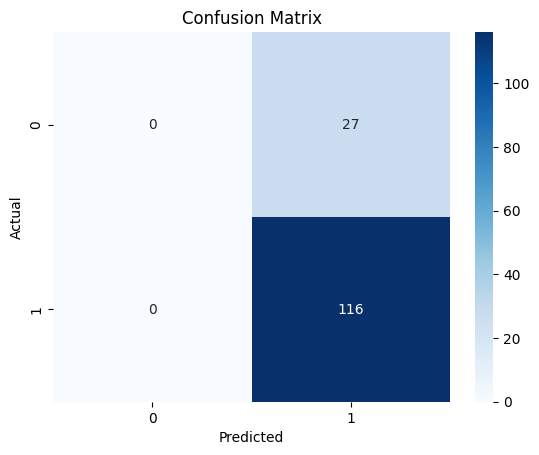

In [ ]:
# Import library yang diperlukan
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Menghitung confusion matrix
cm = confusion_matrix(y_test, predictions)

# Membuat heatmap dari confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()